In [30]:
import warnings

import numpy as np

from HW1.coord_relaxer import LinearCoordRelaxer
from HW1.gradient_descent import gradient_descent
from HW1.visualize import draw_2D, draw_3D

Метод золотого сечения.
---

0. Берем отрезок [a, b]
1. Ставим на нем две точки `x1` и `x2` в пропорции золотого сечения.
    $x_1 = b - {b - a \over \phi}$
    $x_2 = a + {b - a \over \phi}$
2. Считаем значения в этих точках
    $y_1 = f(x_1)$
    $y_2 = f(x_2)$
3. Проверяем, если $|y_1 - y_2| < \varepsilon$, значит мы достаточно близко к ответу (с точностью $\varepsilon$). Здачит, завершаем программу.
4. Сдвигаем границы
    Если $y_1 \leq y_2 \Rightarrow b = x_2, x_2 = x_1, x_1 = b - {b - a \over \phi}, y_2 = y_1, y_1 = f(x_1)$
    Если $y_2 \leq y_1 \Rightarrow a = x_1, x_1 = x_2, x_2 = a + {b - a \over \phi}, y_1 = y_2, y_2 = f(x_2)$
5. Возвращаемся к пункту `3`

# Example 1

> $dim = 1$.
>
> $f(x) = {x^4 \over 1e7}$

In [31]:
def f(coord):
    return (coord ** 4) / 1e7

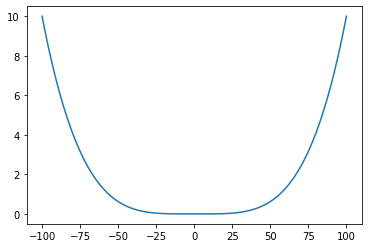

In [32]:
draw_2D(f)

[-8.86752257] [0.00061831]
{'gradient_call_count': 1523, 'function_call_count': 27241, 'points': array([[-4.38663045e+01,  3.70274835e-01],
       [-4.35286684e+01,  3.59005850e-01],
       [-4.31987686e+01,  3.48245466e-01],
       ...,
       [-8.87310208e+00,  6.19871845e-04],
       [-8.87031100e+00,  6.19092279e-04],
       [-8.86752257e+00,  6.18314184e-04]])}


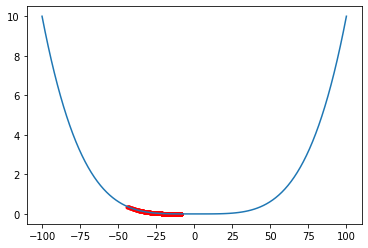

In [33]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    (x, y), meta = gradient_descent(f, 1, coord_relaxer=LinearCoordRelaxer(f, eps=1e-5))
    print(x, y)
    print(meta)

    draw_2D(f, meta["points"])

# Example 2

> $dim = 2$.
>
> $f(x, y) = sin(x / 20) * cos(e + y / 20)$

In [34]:
def f(coord):
    return np.sin(coord[0] / 20) * np.cos(np.e + coord[1] / 20)

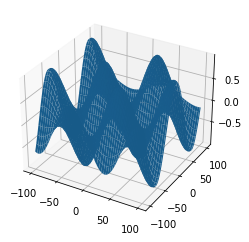

In [35]:
draw_3D(f)

/home/easyhacks/Документы/git/Optimization-Methods-IFMO/HW1/gradient_descent.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([coord, f(coord)]).reshape(1, 2),


[31.41596409  8.46618743] -0.999999999997181
{'gradient_call_count': 65, 'function_call_count': 883, 'points': array([[array([44.68404805,  0.68891306]), -0.7290746976982108],
       [array([42.12009598,  2.03279019]), -0.8160431804738377],
       [array([39.94310018,  3.25618897]), -0.8797590387984795],
       [array([38.14518819,  4.31117597]), -0.9236310449353281],
       [array([36.69170868,  5.18705988]), -0.9524618364771807],
       [array([35.53443636,  5.89584016]), -0.9707992285279249],
       [array([34.62215105,  6.46014293]), -0.9822159014635193],
       [array([33.90777075,  6.90464901]), -0.989225473337216],
       [array([33.35051153,  7.25266871]), -0.9934936673861677],
       [array([32.91702622,  7.52395164]), -0.9960781970241803],
       [array([32.58021733,  7.73503547]), -0.9976389363948938],
       [array([32.31888516,  7.89892077]), -0.9985791615578492],
       [array([32.11611101,  8.02617043]), -0.9991453471246655],
       [array([31.95894205,  8.12480487]), -0

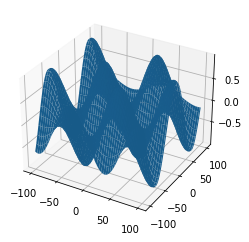

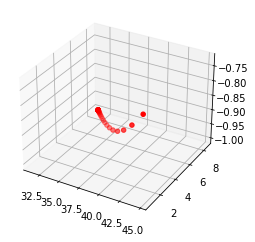

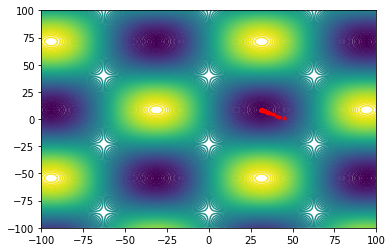

In [36]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    (xs, y), meta = gradient_descent(f, 2, lr=0.9, coord_relaxer=LinearCoordRelaxer(f, eps=1e-3))
    print(xs, y)
    print(meta)

    draw_3D(f, meta["points"])